In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [566]:
spam = pd.read_csv('spam_ham_dataset.csv')
spam1 = pd.read_csv(r"D:\PROJECT\EmailSpam\spam (2).csv", encoding='latin1',usecols=['v1','v2'])
temp_spam = spam[['text','label_num']]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [582]:
temp_spam.rename(columns={'label_num':'target'},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\1640679944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_spam.rename(columns={'label_num':'target'},inplace=True)


In [835]:
temp_spam.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [836]:
spam1.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [837]:
LBE = LabelEncoder()
spam1['target']=LBE.fit_transform(spam1['target'])
spam1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [838]:
merge = pd.concat([spam1,temp_spam],ignore_index=True)

In [839]:
spam1.shape

(5572, 2)

In [840]:
temp_spam.shape

(5171, 2)

In [586]:
merge.shape

(10743, 2)

<Axes: ylabel='count'>

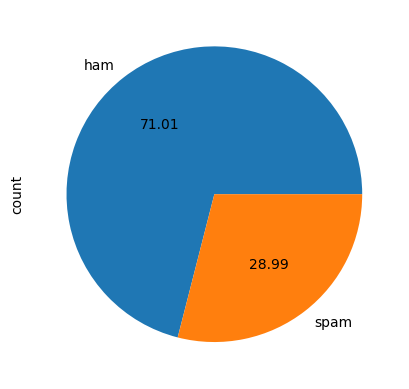

In [150]:
spam['label_num'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%0.2f')

<Axes: ylabel='count'>

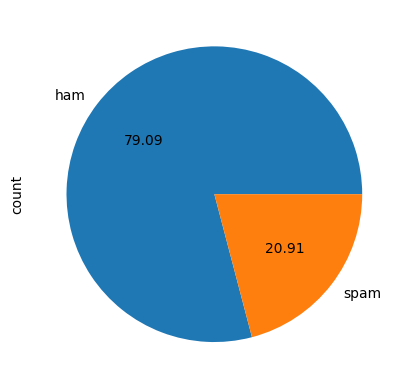

In [831]:
merge['target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%0.2f')

In [856]:
ham_df = merge[merge['target'] == 0]
spam_df = merge[merge['target'] == 1]

# Drop 20% of ham → keep 80%
ham_reduced = ham_df.sample(frac=0.3, random_state=42)  # reproducible
# Combine back with spam
balanced_df = pd.concat([ham_reduced, spam_df], axis=0)

<Axes: ylabel='count'>

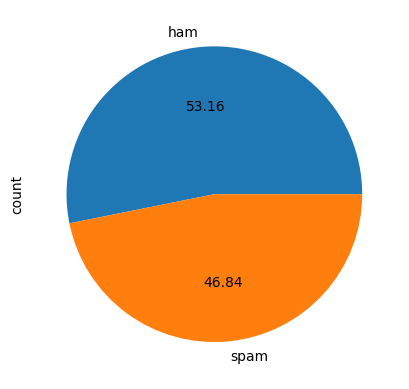

In [857]:
balanced_df['target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%0.2f')

In [151]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import nltk
nltk.download('punkt_tab')

In [153]:
spam['num_char']=spam['text'].apply(len)

In [154]:
spam.head()

,Unnamed: 0,label,text,label_num,num_char
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [155]:
spam['num_word']=spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [156]:
spam.head()

,Unnamed: 0,label,text,label_num,num_char,num_word
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [157]:
spam['num_sent']=spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [158]:
spam.head()

,Unnamed: 0,label,text,label_num,num_char,num_word,num_sent
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [159]:
spam[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [160]:
spam[spam['label_num']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [161]:
spam[spam['label_num']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


<Axes: xlabel='num_char', ylabel='Count'>

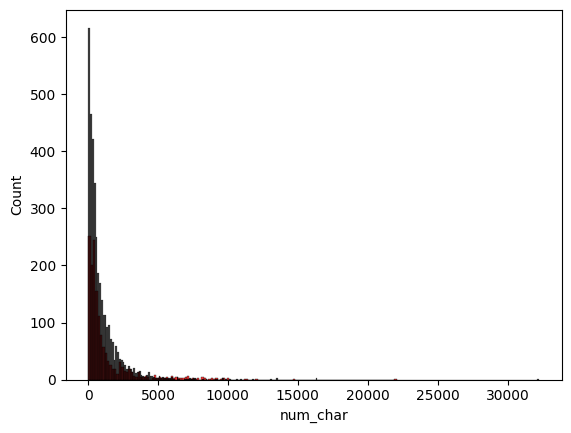

In [162]:

sns.histplot(spam[spam['label_num']==1]['num_char'],color='red')
sns.histplot(spam[spam['label_num']==0]['num_char'],color='black')

<Axes: xlabel='num_word', ylabel='Count'>

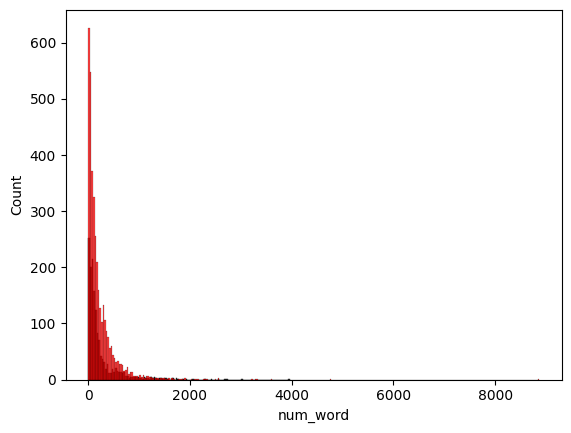

In [163]:
sns.histplot(spam[spam['label_num']==1]['num_word'],color='black')
sns.histplot(spam[spam['label_num']==0]['num_word'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

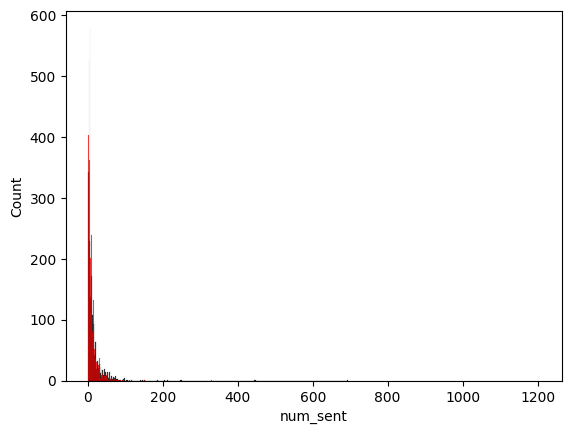

In [164]:
sns.histplot(spam[spam['label_num']==1]['num_sent'],color='black')
sns.histplot(spam[spam['label_num']==0]['num_sent'],color='red')

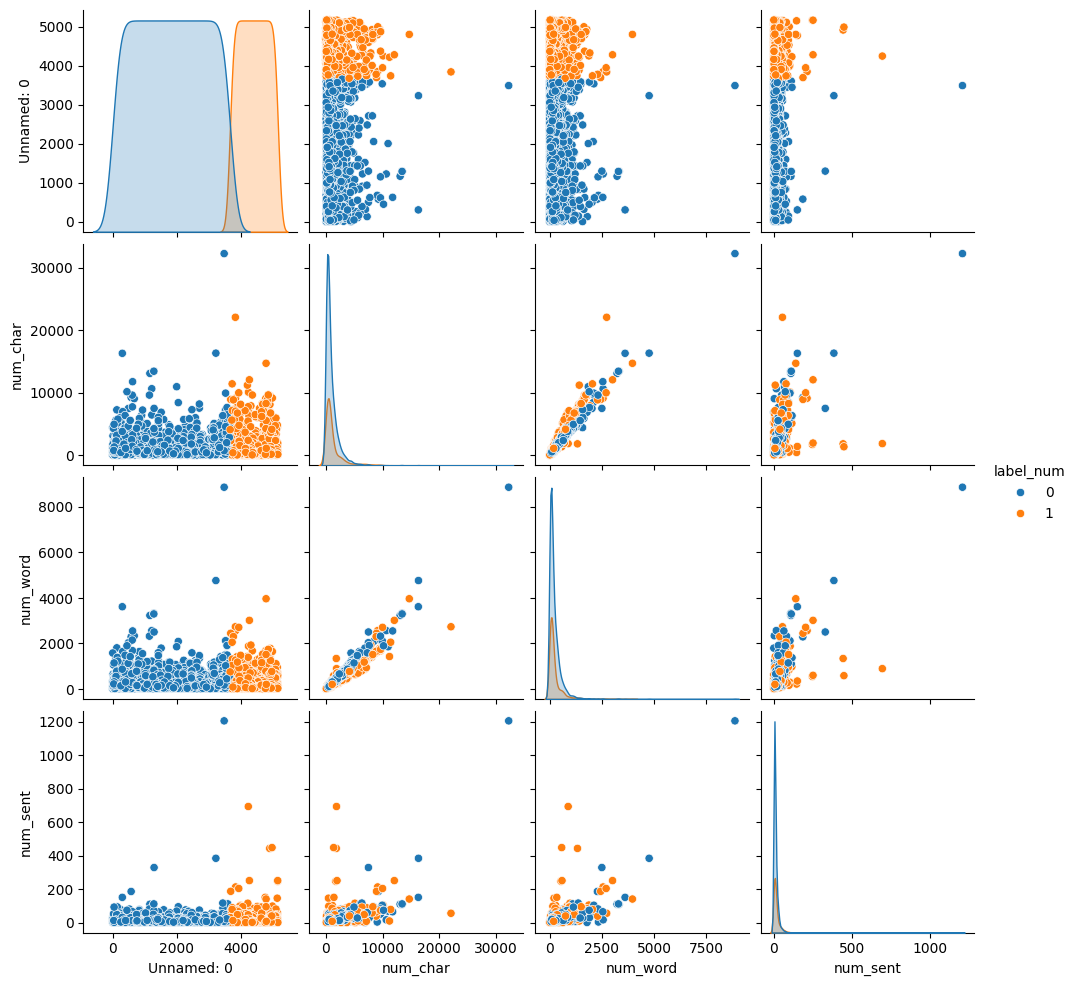

In [165]:
sns.pairplot(spam,hue='label_num')

<Axes: >

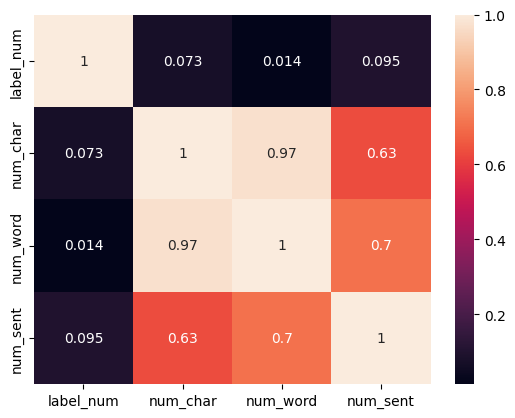

In [166]:
sns.heatmap(spam[['label_num','num_char','num_word','num_sent']].corr(),annot=True)

### Data Preprocessing
- lower case
- tokenization
- remove special char
- remove stop word and punctuation
- stemming

In [591]:
merge.isnull().mean()

target    0.0
text      0.0
dtype: float64

In [ ]:
nltk.download('stopwords')

In [167]:
from nltk.corpus import stopwords
import string

In [168]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("lovely")

'love'

In [827]:
def preprocessing_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = []
    for i in text:
        if(i.isalnum()):
            temp.append(i)
    text = temp[:]
    temp.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    text = temp[:]
    temp.clear()
    for i in text:
        temp.append(ps.stem(i))
    return " ".join(temp);

In [ ]:
# stopwords.words('english')

In [863]:
# string.punctuation
balanced_df['text'].iloc[7]

"Subject: intraday eastrans nominations change for 9 / 6 / 00 and nomination for\r\n9 / 7 / 00\r\ndeliveries continue to be 30 , 000 mmbtu / dy\r\nthe redeliveries will be :\r\n8500 from fuels cotton valley\r\n10955 to hpl ' s cartwheel agreement at carthage\r\n10545 at mobil beaumont\r\neffective for 9 / 7 / 00 , deliveries to eastrans continue to be 30 , 000 mmbtu / dy\r\nthe redeliveries will be :\r\n8500 from fuels cotton valley\r\n21500 to hpl ' s cartwheel agreement at carthage"

In [864]:
preprocessing_text(balanced_df['text'].iloc[7])

'subject intraday eastran nomin chang 9 6 00 nomin 9 7 00 deliveri continu 30 000 mmbtu dy redeliveri 8500 fuel cotton valley 10955 hpl cartwheel agreement carthag 10545 mobil beaumont effect 9 7 00 deliveri eastran continu 30 000 mmbtu dy redeliveri 8500 fuel cotton valley 21500 hpl cartwheel agreement carthag'

In [865]:
balanced_df['transformed_text']=balanced_df['text'].apply(preprocessing_text)

In [867]:
# spam1['transformed_text']=spam1['text'].apply(preprocessing_text)
balanced_df.shape

(4795, 3)

In [171]:
list1 = ['lovely','dancing','true','truely']
for i in list1:
  print(ps.stem(i))

love
danc
true
trueli


In [542]:
spam1.head(2)

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni


In [181]:
from wordcloud import WordCloud
wc = WordCloud()

In [220]:

spam_wc1 = wc.generate(spam[spam['label_num']==1]['transformed_text'].str.cat(sep=" "))


Text(0.5, 1.0, 'Spam email')

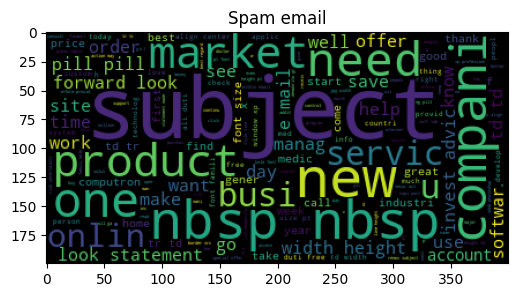

In [221]:
plt.figure(figsize=(11,3))
plt.imshow(spam_wc1)
plt.title('Spam email')

In [214]:
spam_wc2 = wc.generate(spam[spam['label_num']==0]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'Not Spam Email')

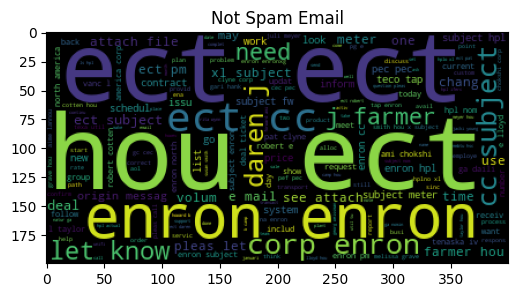

In [217]:
plt.figure(figsize=(11,3))
plt.imshow(spam_wc2)
plt.title('Not Spam Email')

In [237]:
spam_word = []
for sent in spam[spam['label_num']==1]['transformed_text'].tolist():
    for word in sent.split():
       spam_word.append(word)



In [228]:
from collections import Counter

In [245]:
Counter(spam_word).most_common(30)

[('subject', 1659),
 ('3', 1239),
 ('com', 992),
 ('http', 984),
 ('compani', 918),
 ('2', 858),
 ('price', 732),
 ('1', 720),
 ('0', 698),
 ('e', 638),
 ('www', 587),
 ('00', 585),
 ('inform', 557),
 ('get', 555),
 ('font', 515),
 ('email', 513),
 ('5', 510),
 ('pleas', 506),
 ('td', 504),
 ('secur', 499),
 ('statement', 497),
 ('4', 494),
 ('invest', 473),
 ('us', 469),
 ('stock', 467),
 ('product', 463),
 ('7', 457),
 ('time', 449),
 ('new', 432),
 ('may', 421)]

In [240]:
not_spam_word = []
for sent in spam[spam['label_num']==0]['transformed_text'].tolist():
    for word in sent.split():
       not_spam_word.append(word)

In [258]:
df=pd.DataFrame(Counter(not_spam_word).most_common(30),columns=['word','count'])
df.head()

,word,count
0,ect,13897
1,hou,7281
2,enron,6555
3,subject,6405
4,2000,4308


In [269]:
df1=pd.DataFrame(Counter(spam_word).most_common(30),columns=['word','count'])
df1.head()

,word,count
0,subject,1659
1,3,1239
2,com,992
3,http,984
4,compani,918


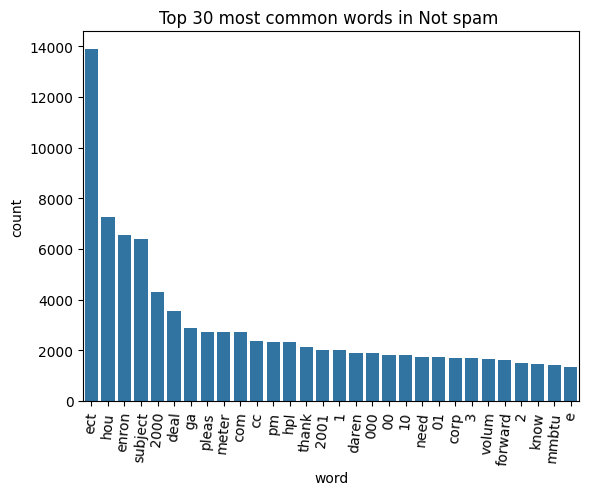

In [267]:
sns.barplot(x='word',y='count',data=df)
plt.xticks(rotation=85)
plt.title('Top 30 most common words in Not spam ')
plt.show()

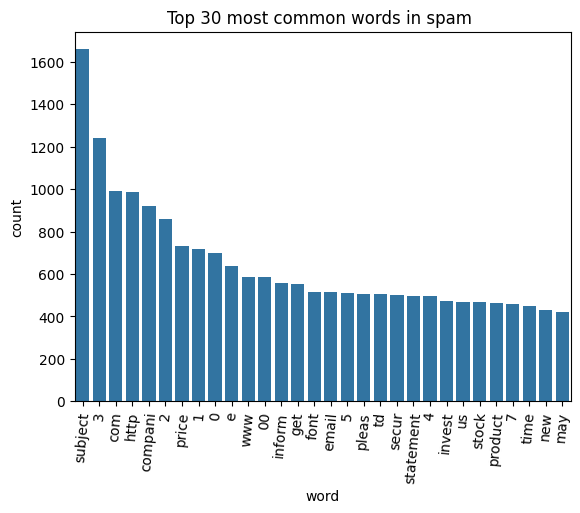

In [270]:
sns.barplot(x='word',y='count',data=df1)
plt.xticks(rotation=85)
plt.title('Top 30 most common words in spam ')
plt.show()

### Model Building

In [868]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=6708)
# list1=[]
# precision=[]
# accuracy = []
# for i in range(1,40):
#    list1.append(1000*i)
# for i in list1:
#     tfidf = TfidfVectorizer(max_features=i)
#     X = tfidf.fit_transform(merge['transformed_text']).toarray()
#     y = merge['target'].values
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
#     MNNB.fit(X_train,y_train)
#     M_pred = MNNB.predict(X_test)
#     precision.append(precision_score(y_test,M_pred))
#     accuracy.append(accuracy_score(y_test,M_pred))

In [809]:
# precision[20],accuracy[20]

In [869]:
X = tfidf.fit_transform(balanced_df['transformed_text']).toarray()
X.shape
# X1 = tfidf.fit_transform(spam1['transformed_text']).toarray()
# X1.shape

(4795, 6708)

In [871]:
y = balanced_df['target'].values
y.shape

# y1 = spam1['target'].values
# y1.shape

(4795,)

In [812]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=2)

In [872]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
GNB = GaussianNB()
MNNB = MultinomialNB()
BNB = BernoulliNB()

In [873]:
GNB.fit(X_train,y_train)
G_pred = GNB.predict(X_test)

In [874]:
print('Gaussian Naive Bayes ---------------')
print(accuracy_score(y_test,G_pred))
print(confusion_matrix(y_test,G_pred))
print(precision_score(y_test,G_pred))

Gaussian Naive Bayes ---------------
0.8161935784085621
[[1348  364]
 [  31  406]]
0.5272727272727272


In [875]:
MNNB.fit(X_train,y_train)
M_pred = MNNB.predict(X_test)

In [876]:
print("Multinomila Naive bayes---------")
print(accuracy_score(y_test,M_pred))
print(confusion_matrix(y_test,M_pred))
print(precision_score(y_test,M_pred))

Multinomila Naive bayes---------
0.955793392275477
[[1688   24]
 [  71  366]]
0.9384615384615385


In [877]:
MNNB.fit(X1_train,y1_train)
M_pred = MNNB.predict(X1_test)

In [879]:
print("Multinomila Naive bayes---------")
print(accuracy_score(y1_test,M_pred))
print(confusion_matrix(y1_test,M_pred))
print(precision_score(y1_test,M_pred))

Multinomila Naive bayes---------
0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [880]:
BNB.fit(X1_train,y1_train)
B_pred = BNB.predict(X1_test)

In [881]:
print("Bernoulli Naive bayes---------")
print(accuracy_score(y1_test,B_pred))
print(confusion_matrix(y1_test,B_pred))
print(precision_score(y1_test,B_pred))

Bernoulli Naive bayes---------
0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [822]:
# tfidf with MNNB

In [823]:
import pickle as pkl

In [905]:
pkl.dump(tfidf, open('Vectorizer.pkl', 'wb'))
pkl.dump(MNNB, open('MultinomialNB.pkl', 'wb'))
pkl.dump(BNB,open('bernoulliNB.pkl','wb'))

In [902]:
sms = input("enter text")

enter text Hey, are we still meeting at the café this evening?”


In [903]:
process_sms = preprocessing_text(sms)
vector_sms = tfidf.transform([process_sms])
vector_sms.shape

(1, 6708)

In [904]:
BNB.predict(vector_sms)


array([0])